<!DOCTYPE html>
<html>
<body>
<div align="center">
<h3>Made by Manthan A Panchal</h3>
    
<h1>Hclustering and Kmeans clustering</h1>

<h3>Follow Me on - <a href="https://www.linkedin.com/in/manthan-panchal-046b3b198/">LinkedIn</a>&nbsp; 
</div>

</div>
</body>
</html>

Perform clustering for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.cluster import hierarchical
from sklearn.cluster import DBSCAN

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

plt.style.use('seaborn-darkgrid')
pd.set_option('display.max_rows', None)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.cluster.hierarchical module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df = pd.read_csv('EastWestAirlines.csv')
df.columns
df.head(20)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1


### Initial EDA

In [3]:
df.shape

(3999, 12)

[]

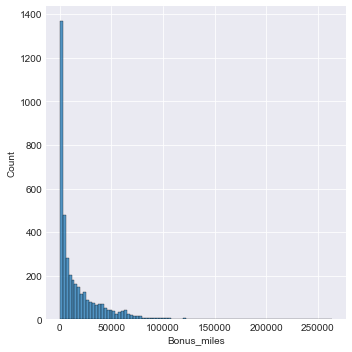

In [4]:
sns.displot(df.Bonus_miles)
plt.plot()

[]

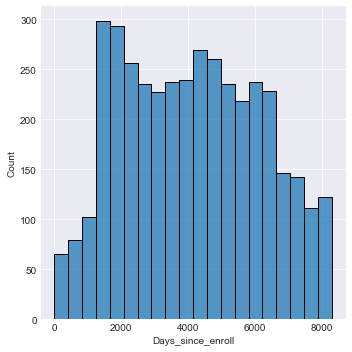

In [5]:
sns.displot(df.Days_since_enroll)
plt.plot()

[]

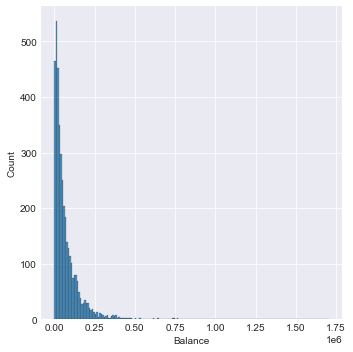

In [6]:
sns.displot(df.Balance)
plt.plot()

### Upon Observation it is evident that the features are not normally distributed

### Standardizing it would give unreliable results so we Normalize it

we have no use for ID so we drop it

In [7]:
df.drop(['ID#'], axis=1, inplace=True)
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [8]:
scaler  = MinMaxScaler()
data  = pd.DataFrame(scaler.fit_transform(df.iloc[:,1:]))
data.head(25)

data.columns = ['Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?']
data 

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.000000,0.00,0.0,0.00,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.000000,0.00,0.0,0.00,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.000000,0.00,0.0,0.00,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.000000,0.00,0.0,0.00,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.000000,0.75,0.0,0.00,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
5,0.000000,0.00,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.836749,0.0
6,0.000000,0.50,0.0,0.00,0.104223,0.290698,0.000000,0.000000,0.843019,0.0
7,0.000000,0.00,0.0,0.00,0.019910,0.046512,0.008112,0.018868,0.836267,1.0
8,0.000000,0.50,0.5,0.00,0.006648,0.500000,0.124931,0.226415,0.837473,1.0
9,0.000000,0.50,0.0,0.00,0.107803,0.325581,0.037317,0.056604,0.835423,1.0


In [9]:
data.shape

(3999, 10)

### Model Building

### Hierarical Custering

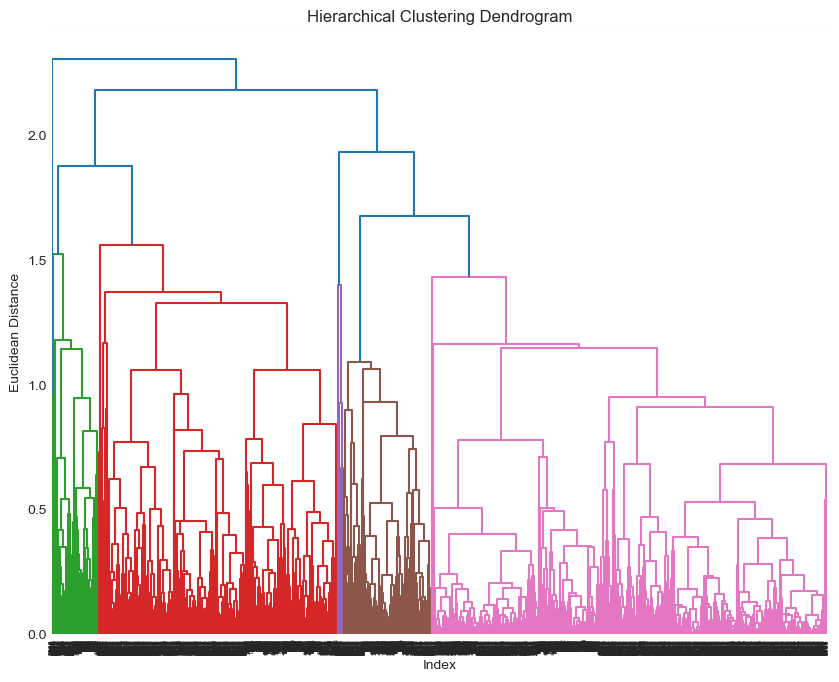

In [10]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch

z = linkage(data, method = 'complete',metric = 'euclidean' )

plt.figure(figsize=(10,8), dpi=100)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Euclidean Distance')
sch.dendrogram(z)
plt.show()

In [11]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 5, linkage = 'complete', affinity = 'euclidean').fit(data)
hc.labels_

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [12]:
data['Hclust']  = pd.DataFrame(hc.labels_) 

In [ ]:
data.head(5)

### Trying to visualize some clusters 

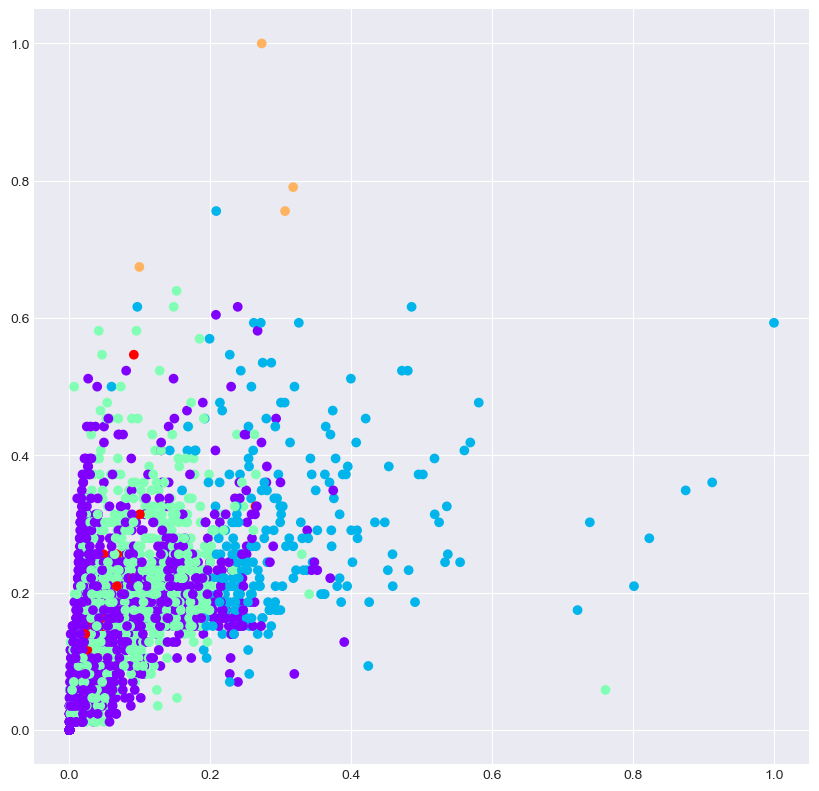

In [14]:
plt.figure(figsize=(10,10), dpi=100)

plt.scatter(data.Bonus_miles, data.Bonus_trans, c = hc.labels_, cmap = 'rainbow')

### Inferences from Hclustering

In [15]:
data.groupby(data.Hclust).mean()

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Hclust,,,,,,,,,,
0,0.007937,0.178099,0.000201,0.002206,0.038740,0.105771,0.007368,0.012321,0.460745,0.000000
1,0.019321,0.972803,0.000000,0.025105,0.307643,0.285784,0.040764,0.072788,0.660694,1.000000
2,0.021979,0.309456,0.004464,0.000609,0.070776,0.161092,0.023176,0.041120,0.538216,1.000000
3,0.031127,0.375000,0.000000,0.000000,0.248912,0.805233,0.647694,0.929245,0.265041,1.000000
4,0.002894,0.000000,0.741935,0.000000,0.055441,0.187547,0.014383,0.037127,0.456023,0.193548


## K-MeansClustering

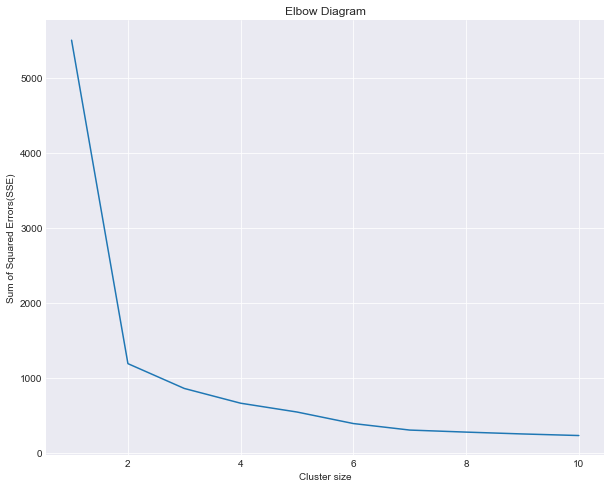

In [16]:
fig = plt.figure(figsize=(10,8))

WCSS = [] #within cluster sum of squares

for i in range(1,11):
    clf = KMeans(n_clusters = i)
    clf.fit(data)
    WCSS.append(clf.inertia_)
    
plt.plot(np.arange(1,11), WCSS)
plt.xlabel('Cluster size')
plt.ylabel('Sum of Squared Errors(SSE)')
plt.title('Elbow Diagram')
plt.show()

### As the diagram speaks the ideal clusters are 2 but it wont make any sense so we try cluster size 4

In [17]:
clf = KMeans(n_clusters=4)
y_kmeans = clf.fit_predict(data)

In [18]:
data['KCLUST']  = pd.DataFrame(y_kmeans)
data.head(5)

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Hclust,KCLUST
0,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0,1
1,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0,1
2,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,0,1
3,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0,1
4,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,2,0


[]

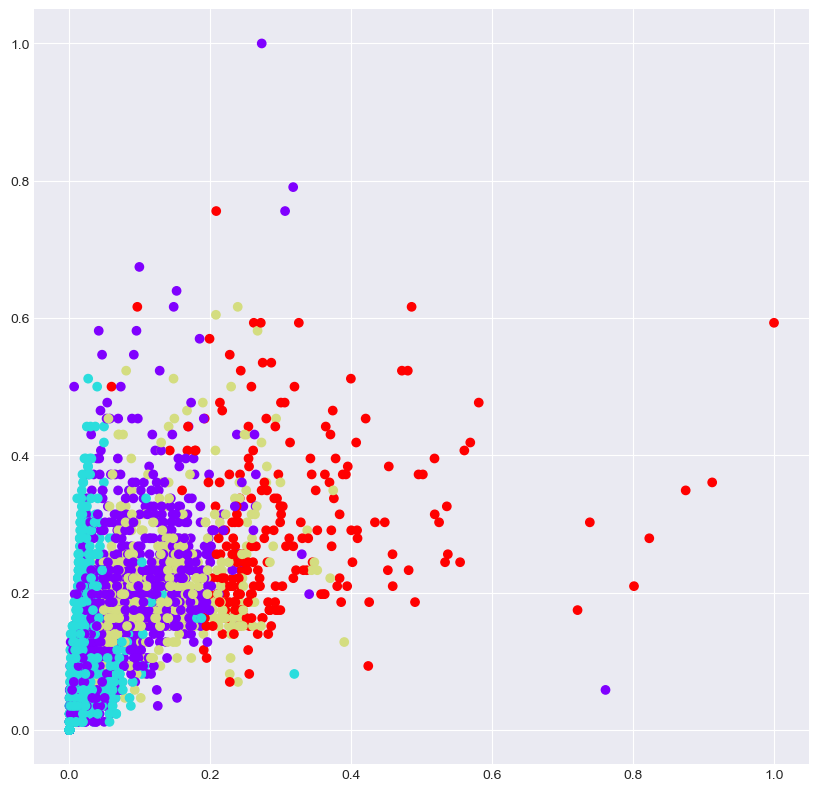

In [19]:
plt.figure(figsize=(10,10), dpi=100)

plt.scatter(data.Bonus_miles, data.Bonus_trans, c = data.KCLUST, cmap = 'rainbow')
plt.plot()

In [20]:
clf.inertia_

657.6865165195161

In [21]:
data.groupby(data.KCLUST).mean()

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Hclust
KCLUST,,,,,,,,,,,
0,0.021541,0.302092,0.022494,0.000592,0.070964,0.163773,0.024932,0.043827,0.535342,0.980268,2.052092
1,0.008390,0.023625,0.000000,0.001068,0.012252,0.074424,0.007382,0.012441,0.436466,0.000000,0.000000
2,0.006569,0.644758,0.000806,0.005645,0.118759,0.200469,0.007324,0.011960,0.534093,0.000000,0.000000
3,0.019321,0.972803,0.000000,0.025105,0.307643,0.285784,0.040764,0.072788,0.660694,1.000000,1.000000


### Inferences

Upon observation we can conclude that the cluster 3 has the highest mean for Days_since_enroll, and Flight miles meaning these are the most
LOYAL customers 

bonus transcation is high for cluster 0 but dayssince enrolled is less these are customers who are potential loyal customers 
if proper schemes are planned these customers can be transformed to loyal customers

cluster 2 has customers which have less flight hours so certain offers can be planned to provide them flight hours so they can be added to our ecosystem 
